## Introduction to the Predictive Analysis Program for Sourcing Cost Optimization

This program is designed to leverage advanced data science techniques to optimize sourcing strategies through predictive analytics. Utilizing a detailed dataset from the Maersk Coding Challenge, the focus is on developing a robust predictive model that can accurately forecast sourcing costs based on historical data. The program integrates comprehensive data analysis, preprocessing, exploratory data analysis (EDA), and model evaluation to identify the most efficient predictive model.

### Overview of Program Structure

1. **Data Loading and Preprocessing**:
   - The program begins by importing the necessary datasets, with a focus on the training dataset that includes various features related to sourcing activities. Initial data exploration involves understanding the dataset's structure, identifying missing values, and preparing the data through cleansing and feature engineering.

2. **Exploratory Data Analysis (EDA)**:
   - In-depth analysis is conducted to unearth trends, patterns, and correlations within the data. This phase helps in understanding the dynamics of sourcing costs across different dimensions such as product types, manufacturers, and sourcing channels.

3. **Feature Engineering and Data Transformation**:
   - Critical to enhancing model performance, this step involves encoding categorical variables and normalizing data to ensure that machine learning algorithms can process them effectively.

4. **Model Development and Benchmarking**:
   - A variety of regression models are implemented to predict sourcing costs. These include Decision Tree, XGBoost, LightGBM, CatBoost, and several others. Each model is trained and evaluated against key performance metrics like Mean Squared Error (MSE), R-squared, and others to gauge its effectiveness.

5. **Model Selection**:
   - The CatBoost model, recognized for its handling of categorical features and efficiency, is selected based on its superior performance metrics, particularly the Mean Squared Error, which directly correlates with the prediction accuracy.

6. **Model Deployment**:
   - The final model is then configured, trained with the full dataset, and its predictions are generated for the test set. The model is saved for operational use, ensuring that the methodology can be replicated and the model can be applied to new data.

7. **Results Documentation and Analysis**:
   - Results are documented in a structured format, providing insights into the model's performance and its implications for sourcing strategies. This comprehensive documentation supports strategic decisions aimed at reducing costs and optimizing sourcing operations.

### Goals and Objectives

The primary goal of this program is to develop a predictive model that minimizes the prediction error (MSE) and provides accurate sourcing cost forecasts. This enables more informed decision-making and strategic planning in sourcing operations, with a clear focus on cost-efficiency and resource optimization.

In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ds-ml-maersk-coding-challenge-data/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv
/kaggle/input/ds-ml-maersk-coding-challenge-data/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv


## Specify the correct file paths for training and testing data

In [104]:
# Specify the correct file paths for training and testing data
test_data_path = '/kaggle/input/ds-ml-maersk-coding-challenge-data/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv'
train_data_path = '/kaggle/input/ds-ml-maersk-coding-challenge-data/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv'

The above code specifies the file paths for the training and testing data for the Maersk Coding Challenge dataset. The dataset consists of two CSV files, one for training and one for testing. The training data file contains information about past shipments, including the sourcing cost, while the testing data file contains information about new shipments, for which the sourcing cost needs to be predicted. The file paths are specified using strings that point to the location of the CSV files in the file system. These file paths will be used later in the code to load the data into pandas DataFrames for further processing and analysis.


## Load the data from CSV files

In [105]:
import pandas as pd
# Load the data from CSV files
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In the above code, we are using the pandas library to load the training and testing data from CSV files. The train_data_path and test_data_path variables contain the file paths for the training and testing data, respectively. The **pd.read_csv()** function is used to read the data from the CSV files and store it in pandas DataFrames, **df_train** and **df_test**, respectively.

In [106]:
#Verifying if the training csv file is imported successfully
df_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [107]:
#Verifying if the testing csv file is imported successfully
df_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


This code will **display the first 5 rows of the df_train DataFrame**, which contains the training data. This is a good way to verify that the training data has been loaded correctly and to get a sense of what the data looks like. The output will be a table that shows the values of the first 5 rows for each column in the DataFrame.

In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


We also use the **df_train.info()** function to display information about the training data, such as the number of rows and columns, the data types of the columns, and the number of non-null values in each column. This can be useful for getting a sense of the structure of the data and for identifying any potential data quality issues.

In [109]:
df_train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


The **describe()** function of a pandas DataFrame generates summary statistics for the numerical columns in the DataFrame. It provides information such as count, mean, standard deviation, minimum, and maximum values for each column.

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.1+ KB


In [111]:
df_test.describe()

,Sourcing Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


We also use the **df_test.info()** function to display information about the training data, such as the number of rows and columns, the data types of the columns, and the number of non-null values in each column. This can be useful for getting a sense of the structure of the data and for identifying any potential data quality issues.

In [112]:
# Check for duplicate observations
df_train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550171     True
550172     True
550173     True
550174     True
550175     True
Length: 550176, dtype: bool

The **duplicated()** function returns a boolean Boolean Series that is True where a duplicate row is found, False otherwise. By default, it checks for duplicates based on all the columns in the dataframe

## Check for missing values in training data

In [113]:
# Check for missing values in training data
df_train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [114]:
# Check for missing values in testing data
print(df_test.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


To check for missing values in the training data, we can use the **isnull()** function of pandas DataFrame, which returns a boolean DataFrame with True for missing values and False for non-missing values. We can then use the **sum()** function to calculate the total number of missing values in each column.

# Exploratory Data Analysis
In this section, we will perform exploratory data analysis on the dataset to gain insights into the data and identify patterns and relationships between variables.

### Trend of Average Sourcing Cost Over Time
First, we will explore the trend of average sourcing cost over time. We will group the data by month and calculate the average sourcing cost.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


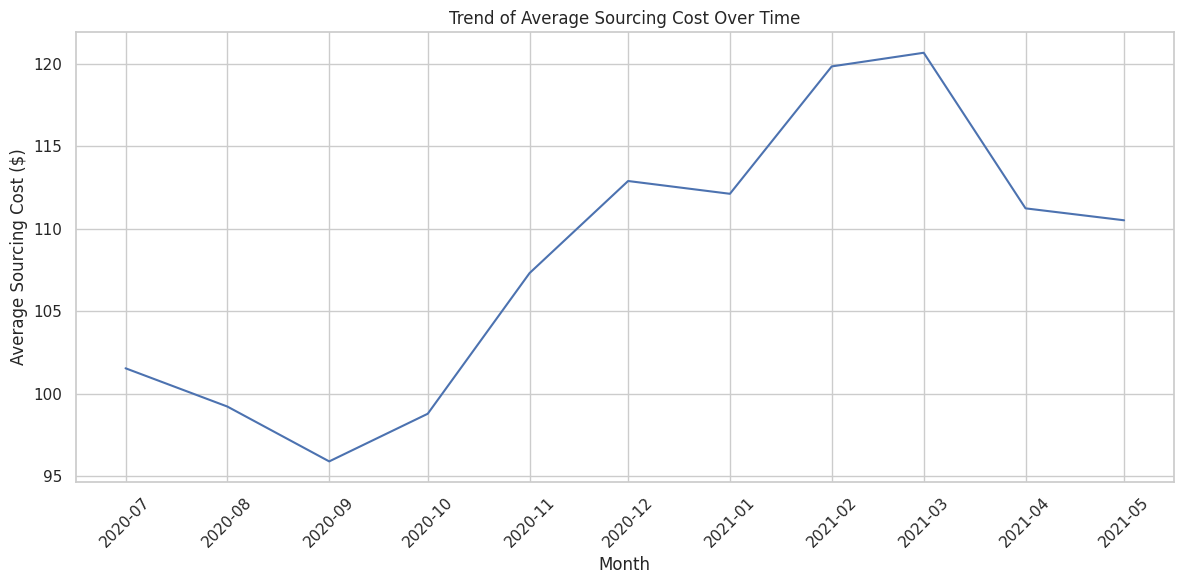

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train_lineplot = df_train
# Convert 'Month of Sourcing' to datetime for easier plotting
df_train_lineplot['Month of Sourcing'] = pd.to_datetime(df_train_lineplot['Month of Sourcing'], format='%b-%y')

# Group by month and calculate the average sourcing cost
monthly_cost = df_train_lineplot.groupby(df_train_lineplot['Month of Sourcing'].dt.to_period("M"))['Sourcing Cost'].mean().reset_index()
monthly_cost['Month of Sourcing'] = monthly_cost['Month of Sourcing'].dt.to_timestamp()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cost, x='Month of Sourcing', y='Sourcing Cost')
plt.title('Trend of Average Sourcing Cost Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sourcing Cost ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Product Demand and Sourcing Efficiency by Area Code
Next, we will explore the product demand and sourcing efficiency by area code. We will group the data by area code, product type, and manufacturer, and calculate the total sourcing volume and average cost.

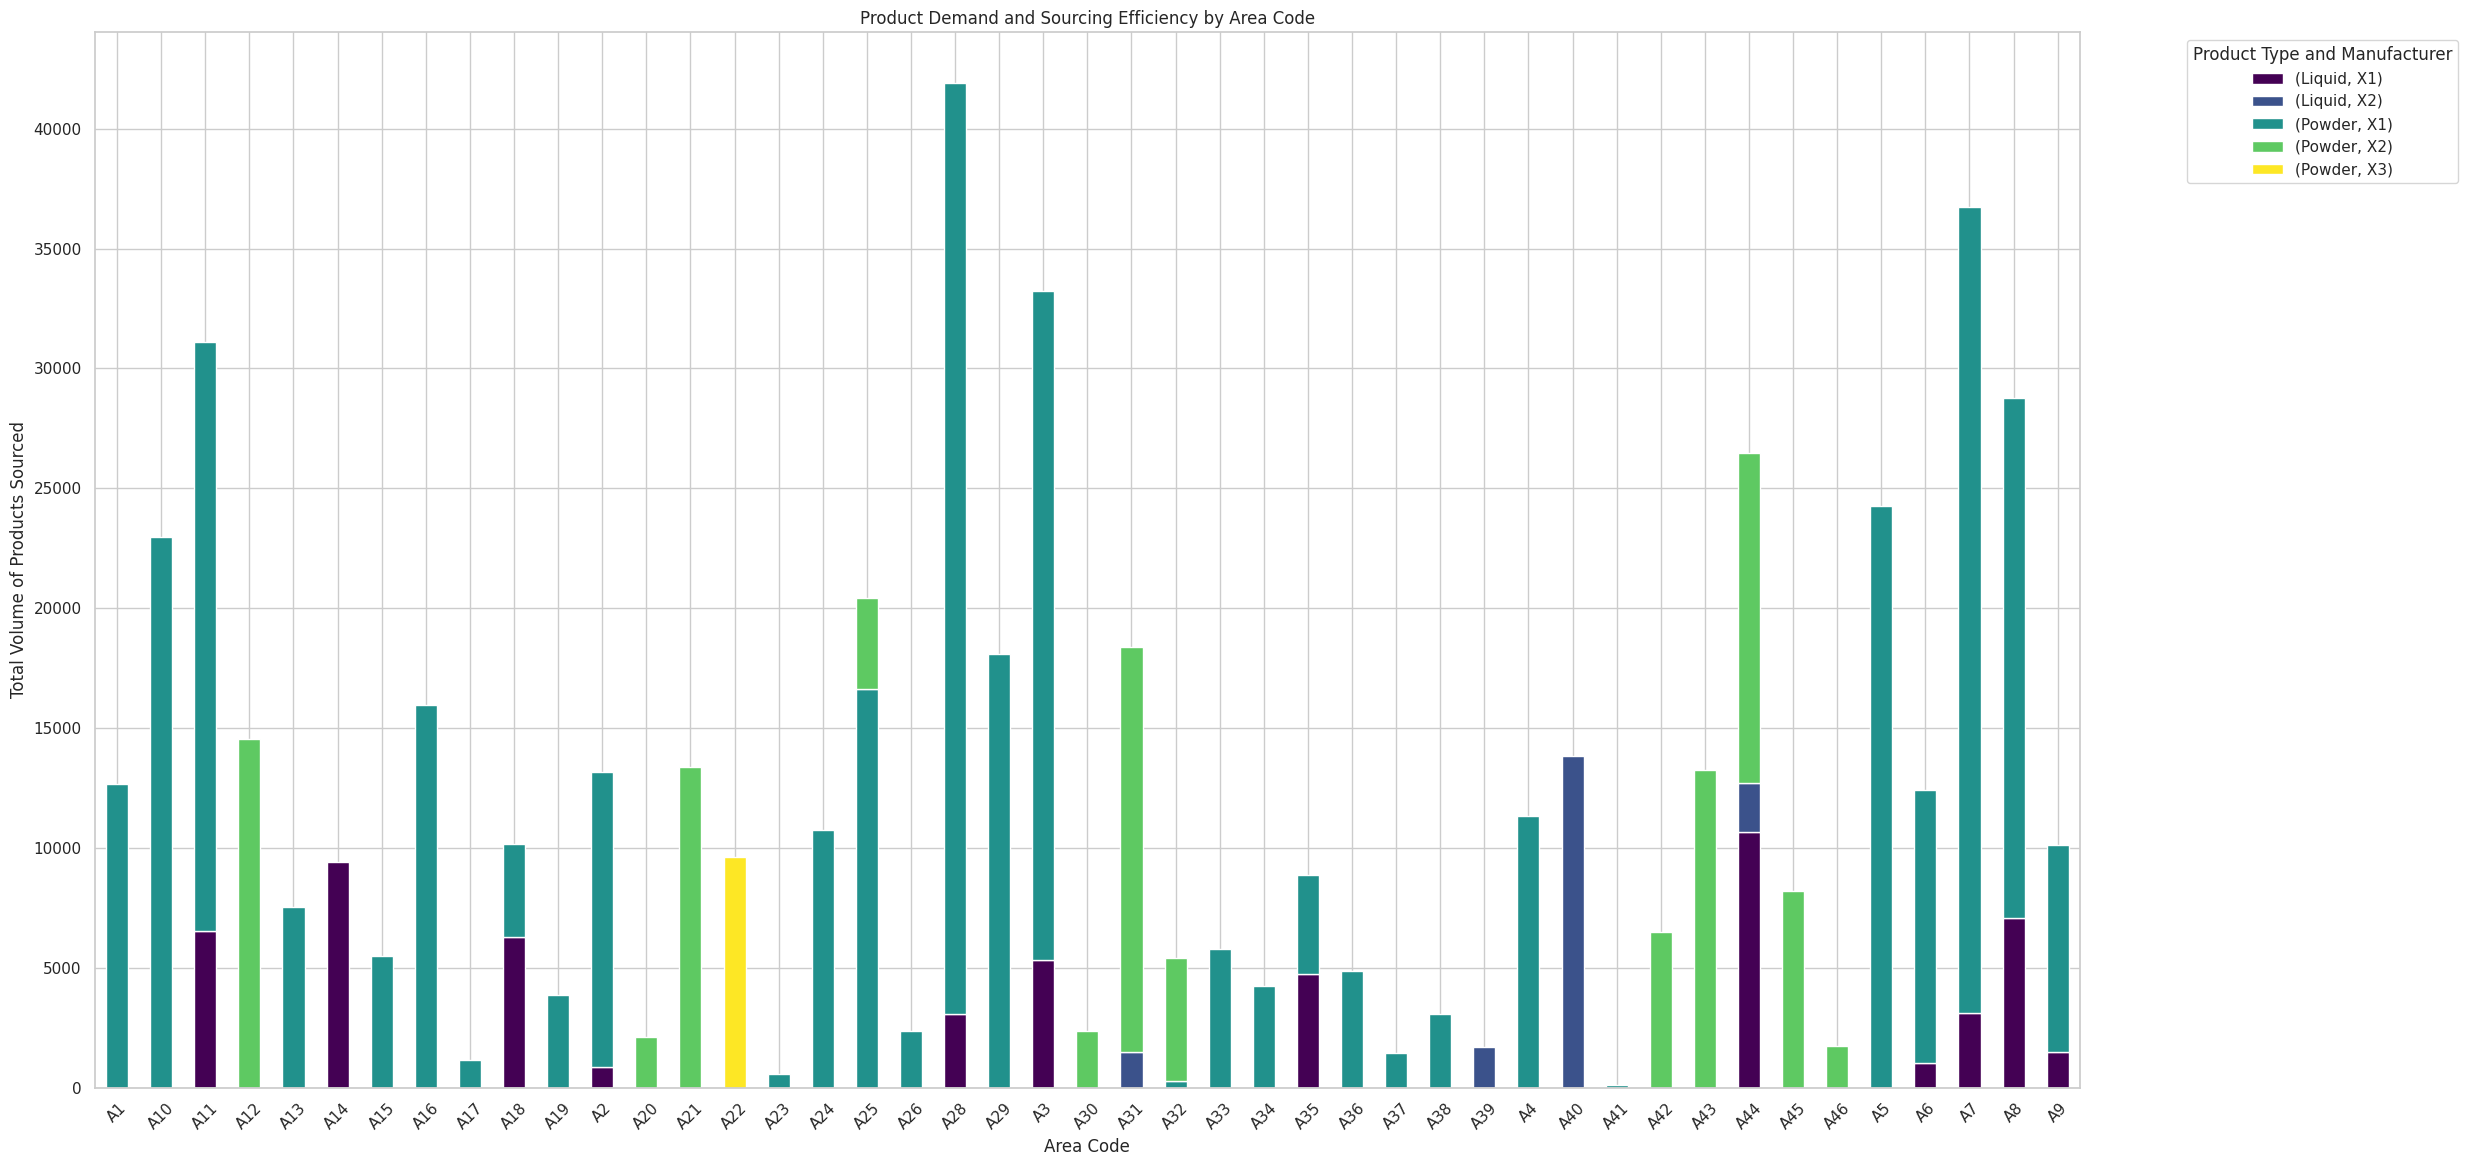

In [121]:
# Calculate the total sourcing volume and average cost for each area code, product type, and manufacturer
grouped_data = df_train.groupby(['Area Code', 'Product Type', 'Manufacturer']).agg(
    Total_Volume=('Sourcing Cost', 'size'),  # Use count of entries as a proxy for volume
    Average_Cost=('Sourcing Cost', 'mean')
).reset_index()

# Create a pivot table for plotting
pivot_data = grouped_data.pivot_table(index='Area Code', columns=['Product Type', 'Manufacturer'], values='Total_Volume', fill_value=0)
# Increase font size
plt.rcParams['font.size'] = 18

# Plot
fig, ax = plt.subplots(figsize=(25, 12))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
ax.set_title('Product Demand and Sourcing Efficiency by Area Code')
ax.set_xlabel('Area Code')
ax.set_ylabel('Total Volume of Products Sourced')
ax.xaxis.set_tick_params(rotation=45)
ax.legend(title='Product Type and Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

By understanding regional demand variations and the constraints of production capabilities, companies can strategically allocate resources and minimize sourcing costs. This analysis enables better procurement decisions, risk management strategies, and customer-centric approaches, ultimately leading to improved operational efficiency, reduced costs, and enhanced customer satisfaction. Through the integration of advanced analytics and agile supply chain practices, companies can effectively navigate market dynamics, capitalize on growth opportunities, and maintain a competitive edge in the marketplace.

### Average Sourcing Cost by Manufacturer
Next, we will explore the average sourcing cost by manufacturer. We will group the data by manufacturer and calculate the average sourcing cost.

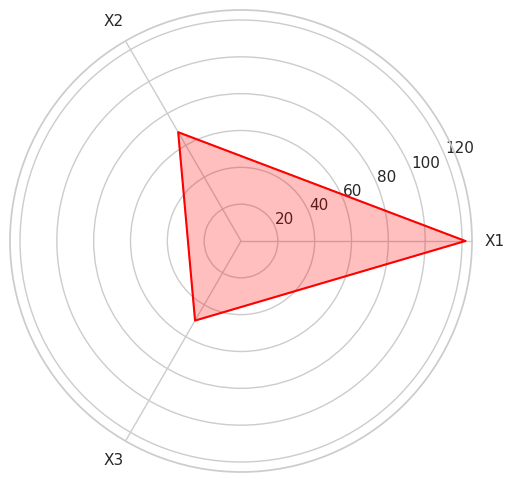

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

categories = df_train['Manufacturer'].unique()
values = [df_train[df_train['Manufacturer'] == cat]['Sourcing Cost'].mean() for cat in categories]

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red')

# Labels for each point
plt.xticks(angles[:-1], categories)

plt.show()

**Cost Comparison:** Manufacturers represented closer to the center of the radar chart have lower average sourcing costs, making them potentially more cost-effective options.

**Cost Variability:** The spread of the values across different axes (manufacturers) indicates variability in cost efficiency among manufacturers. Manufacturers whose lines extend farther from the center are associated with higher sourcing costs.

**Selection Criteria:** For cost-sensitive sourcing strategies, manufacturers closer to the center would be preferred due to their lower average costs. Conversely, if certain manufacturers consistently show higher costs, it might be worth investigating if their products are of higher quality or if there are other value-adding factors involved.

### Average Sourcing Cost by Area Code and Product Type
Finally, we will explore the average sourcing cost by area code and product type. We will group the data by area code and product type and calculate the average sourcing cost.

/tmp/ipykernel_34/3389245544.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_train, x='Area Code', y='Sourcing Cost', hue='Product Type', ci=None)


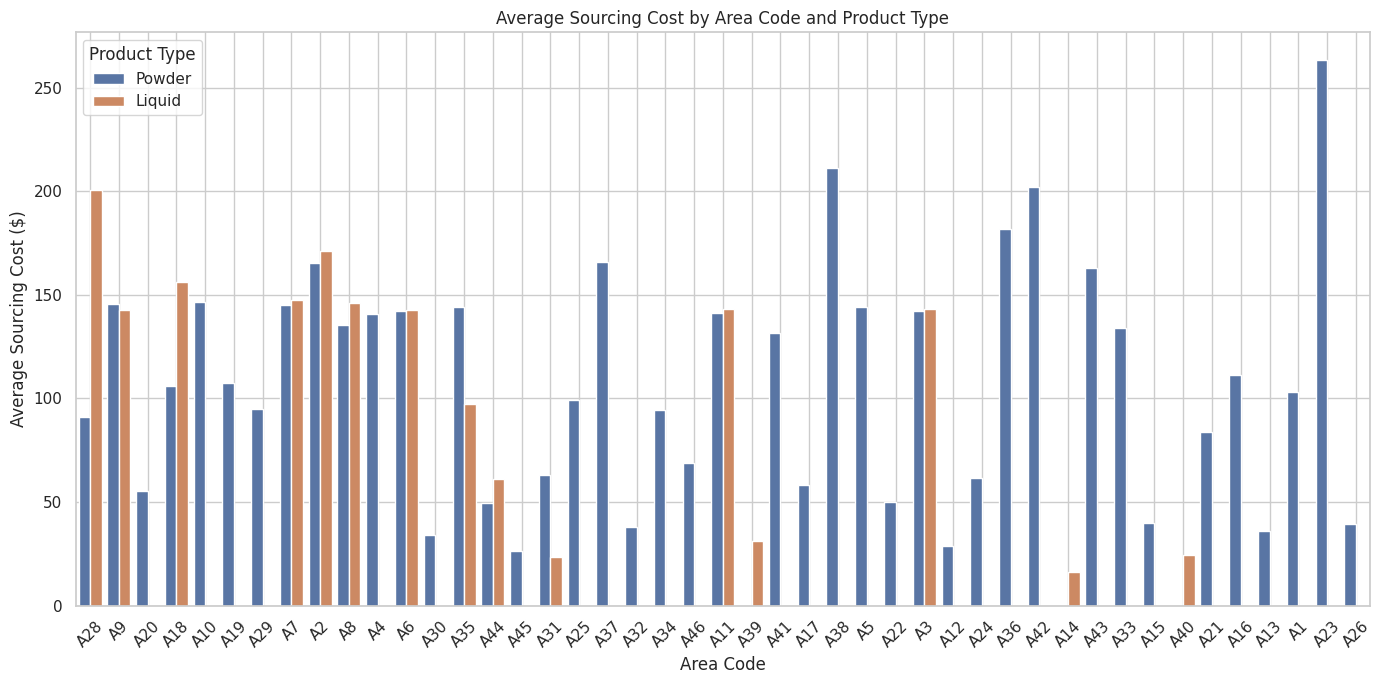

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(14, 7))
sns.barplot(data=df_train, x='Area Code', y='Sourcing Cost', hue='Product Type', ci=None)
plt.title('Average Sourcing Cost by Area Code and Product Type')
plt.xlabel('Area Code')
plt.ylabel('Average Sourcing Cost ($)')
plt.legend(title='Product Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Regional Cost Variations:** There is a clear variation in sourcing costs across different area codes. Some areas consistently show higher costs across product types, which might be influenced by local economic factors, logistical challenges, or supply chain inefficiencies.

**Product Type Costs:** The costs associated with sourcing different product types also vary significantly by area. This suggests that the supply chain for certain product types may be more or less efficient in specific regions. For example, if one product type consistently shows higher costs in certain areas, it might indicate issues with local suppliers, transportation, or even tariffs.

**Strategic Sourcing Opportunities:** Areas with uniformly lower costs across product types might represent opportunities for strategic sourcing initiatives or could be leveraged as centralized hubs for certain products. Conversely, areas with high costs might warrant a review of sourcing strategies or negotiations to optimize expenses.

**Decision-Making for Expansion or Contraction:** The insights from the plot can aid in making decisions regarding expanding or contracting operations in specific areas based on the cost efficiency of sourcing different product types.

### Temporal Heatmap of Sourcing Cost Changes Over Time by Manufacturer
Finally, we will create a heatmap to visualize the changes in sourcing cost over time for each manufacturer.

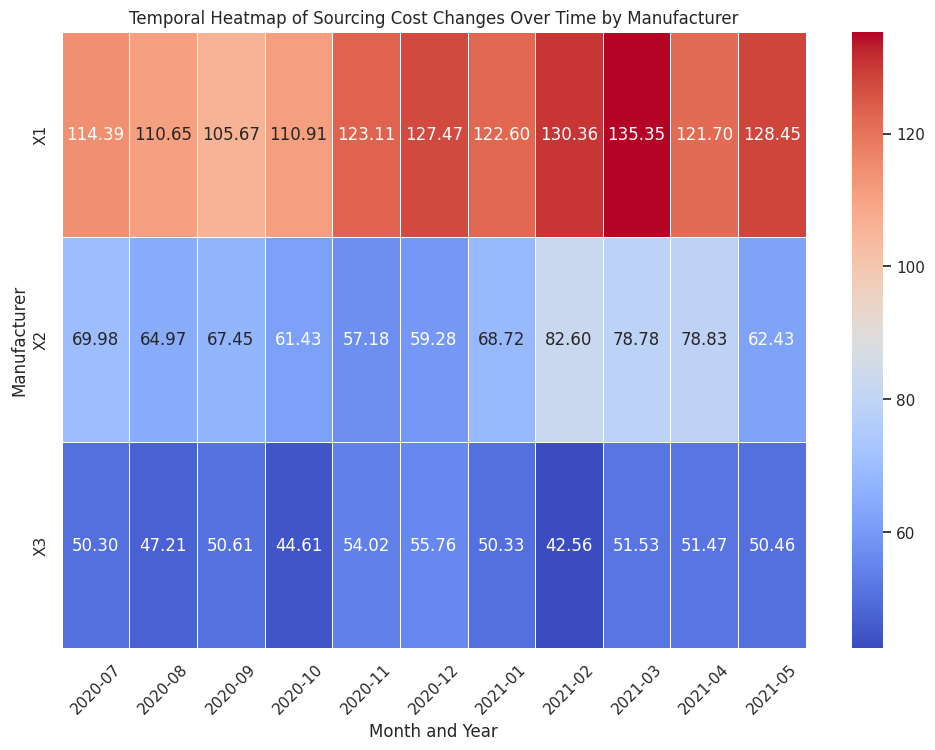

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train_heatmap = df_train
df_train_heatmap['Month of Sourcing'] = pd.to_datetime(df_train_heatmap['Month of Sourcing'], format='%b-%y')
df_train_heatmap['Month-Year'] = df_train_heatmap['Month of Sourcing'].dt.strftime('%Y-%m')

# Prepare data for the heatmap
heatmap_data = df_train_heatmap.pivot_table(index='Manufacturer', columns='Month-Year', values='Sourcing Cost', aggfunc='mean')

# Create the heatmap
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, ax=ax)
ax.set_title('Temporal Heatmap of Sourcing Cost Changes Over Time by Manufacturer')
ax.set_xlabel('Month and Year')
ax.set_ylabel('Manufacturer')
ax.xaxis.set_ticklabels(heatmap_data.columns, rotation=45)

plt.show()

It is pretty evident to see how costs fluctuate across different months, potentially indicating seasonal demand, pricing changes, or supply issues. For some manufacturers, there may be trends of increasing or decreasing costs, which could signal changes in supply chain efficiency or alterations in procurement strategies. Quickly compare which manufacturers tend to have higher or lower costs over time, and identify any outliers with unexpected cost spikes or drops.

# Insights: Quarterly Data Visualisation

### Quarterly Trend of Average Sourcing Costs
First, we will extract the year and quarter from the **'Month of Sourcing'** column and calculate the average sourcing cost for each combination of year and quarter. We will then create a line plot to visualize the trend of average sourcing costs over time.

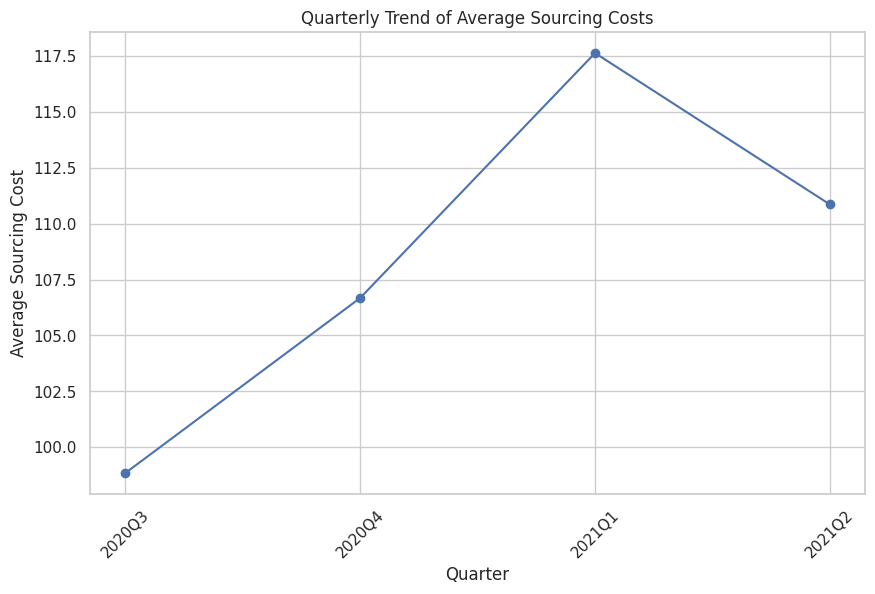

In [124]:
import matplotlib.pyplot as plt

df_train_quarter = df_train

# Parse the 'Month of Sourcing' to extract year and quarter
df_train_quarter['Year'] = pd.to_datetime(df_train_quarter['Month of Sourcing'], format='%b-%y').dt.year
df_train_quarter['Quarter'] = pd.to_datetime(df_train_quarter['Month of Sourcing'], format='%b-%y').dt.to_period('Q')

# Calculate the average sourcing cost for each combination of year and quarter
quarterly_costs = df_train_quarter.groupby(['Year', 'Quarter'])['Sourcing Cost'].mean().reset_index()


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(quarterly_costs['Quarter'].astype(str), quarterly_costs['Sourcing Cost'], marker='o')

# Adding labels and title
plt.title('Quarterly Trend of Average Sourcing Costs')
plt.xlabel('Quarter')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

The quarterly trend of average sourcing costs shows a significant increase from the third quarter of 2020 to the first quarter of 2021, suggesting influences from seasonal demand, market changes, or supply chain adjustments. A subsequent stabilization in the second quarter of 2021 hints at potential seasonality in the sourcing costs. The data is limited to early 2021, and for a more comprehensive analysis, extending the data collection across subsequent quarters would be beneficial. Cross-referencing these cost variations with external economic events or supply chain disruptions could provide deeper insights. Further breaking down these costs by product type or manufacturer could reveal specific trends that might inform targeted strategic decisions, such as optimizing sourcing strategies or renegotiating contracts during typically lower-cost periods.

### Quarterly Product Volumes by Product Type and Manufacturer
Next, we will aggregate the count of products sourced by quarter, product type, and manufacturer. We will then create a heatmap to visualize the product volumes by product type and manufacturer for each quarter.

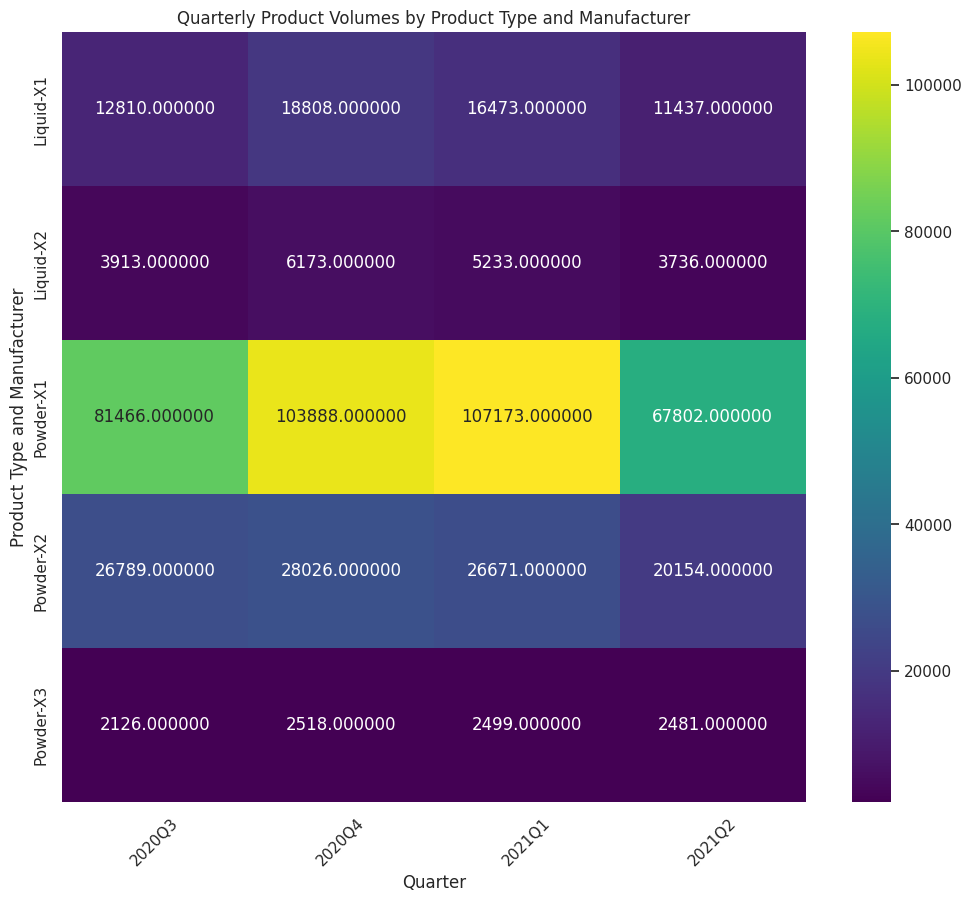

In [125]:
# Aggregate the count of products sourced by quarter, product type, and manufacturer
product_volumes = df_train.groupby(['Quarter', 'Product Type', 'Manufacturer']).size().reset_index(name='Volume')

# Ensure the 'Volume' values are integers
product_volumes['Volume'] = product_volumes['Volume'].astype(int)

# Pivot the data again with integer volumes
volume_pivot = product_volumes.pivot_table(index=['Product Type', 'Manufacturer'], columns='Quarter', values='Volume', fill_value=0)

# Create the heatmap with integer annotation format
plt.figure(figsize=(12, 10))
sns.heatmap(volume_pivot, annot=True, fmt="f", cmap='viridis')  # Use 'd' for integer formatting
plt.title('Quarterly Product Volumes by Product Type and Manufacturer')
plt.xlabel('Quarter')
plt.ylabel('Product Type and Manufacturer')
plt.xticks(rotation=45)
plt.show()

Here's the heatmap showing the volume of products sourced each quarter, segmented by product type and manufacturer. This visualization helps in identifying which quarters are the busiest and which combinations of product type and manufacturer see the most sourcing activity.

* The intensity of the color in the heatmap indicates the volume of products sourced, with darker shades representing higher volumes.

* Annotations within the cells indicate the exact volume of products sourced for that specific quarter, product type, and manufacturer combination.

### Estimated Quarterly Revenue by Product Type
We will now aggregate the total sourcing cost by quarter and product type as a proxy for revenue. We will then create a stacked column chart to visualize the estimated revenue by product type for each quarter.

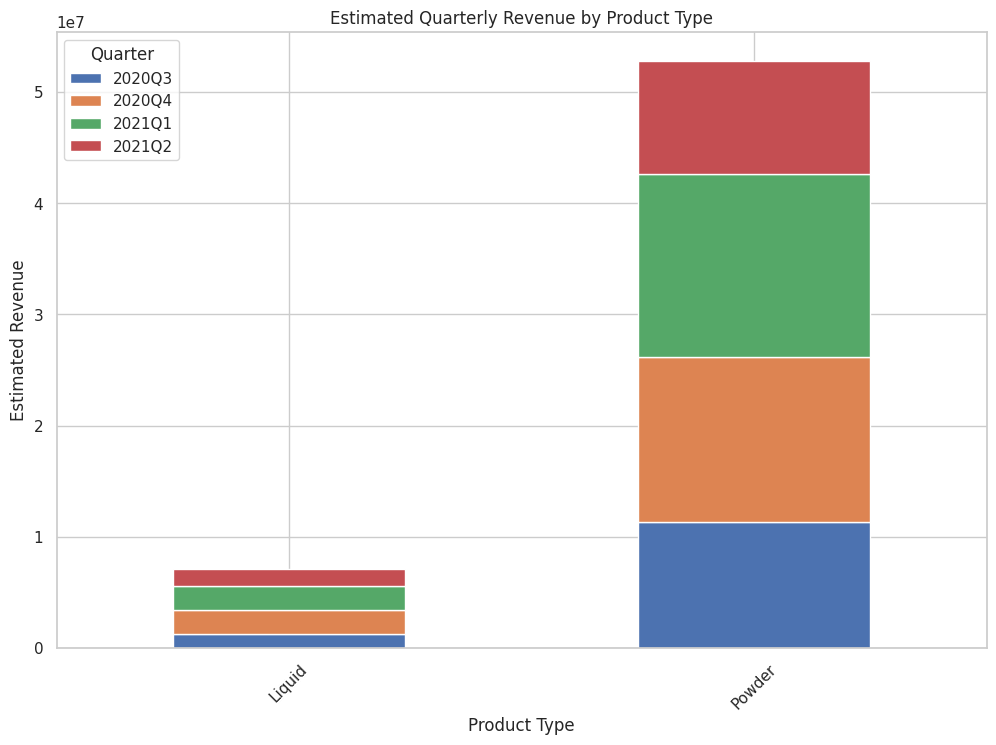

In [126]:
# Aggregate the total sourcing cost by quarter and product type as proxy for revenue
revenue_data = df_train.groupby(['Quarter', 'Product Type'])['Sourcing Cost'].sum().reset_index()

# Pivot the data to get 'Quarter' as columns and 'Product Type' as rows
revenue_pivot = revenue_data.pivot_table(index='Product Type', columns='Quarter', values='Sourcing Cost', fill_value=0)

# Create the stacked column chart
revenue_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Estimated Quarterly Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.show()

The stacked column chart representing the estimated quarterly revenue by product type, using sourcing cost as a proxy for revenue. Each color in the stacks represents a different quarter, allowing you to easily compare how different product segments perform each quarter:

* The chart provides a clear visualization of the relative contributions of different product types to the total revenue across different quarters.
* We can see which product types are consistently bringing in more revenue and how their contributions vary with the seasons or other quarterly factors.

This visualization is particularly useful for identifying trends, planning inventory, and making strategic decisions regarding which product types to focus on in different quarters.

### Manufacturer Sourcing Dynamics
Next, we will create a network graph to visualize the sourcing dynamics between manufacturers and product types. The nodes represent manufacturers and product types, and the edges represent the sourcing cost.

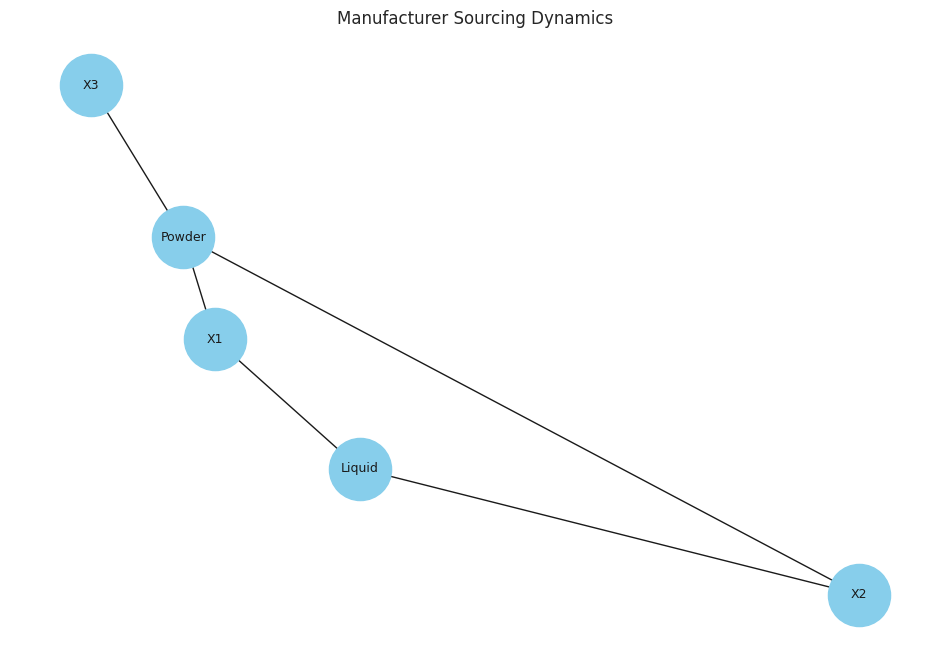

In [128]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
g = nx.Graph()

# Add nodes and edges based on Manufacturer and Product Type
df_train.apply(lambda row: g.add_edge(row['Manufacturer'], row['Product Type'], weight=row['Sourcing Cost']), axis=1)

# Draw the network graph
plt.figure(figsize=(12, 8), facecolor='white')
nx.draw_networkx(g, with_labels=True, node_color='skyblue', edge_color='k', node_size=2000, font_size=9)
plt.title('Manufacturer Sourcing Dynamics')
plt.axis('off')  # Turn off the axis
plt.show()

This graph can help identify which manufacturers are key players for specific product types and how interconnected they are in terms of sourcing activities.

### Market Dynamics by Product Type
To understand the market dynamics and how the sourcing cost varies with respect to product types over time, we can aggregate the total sourcing cost by quarter and product type. We can then pivot the data to get 'Quarter' as columns and 'Product Type' as rows.

The resulting chart allows us to see how each product type contributes to the total sourcing cost over time. The chart helps us to understand the market dynamics and how the sourcing cost varies with respect to product types over time.

Quarter            2020Q3       2020Q4       2021Q1       2021Q2
Product Type                                                    
Liquid         1285716.71   2142154.27   2149468.63   1521097.62
Powder        11276970.34  14863322.05  16443146.52  10186783.26


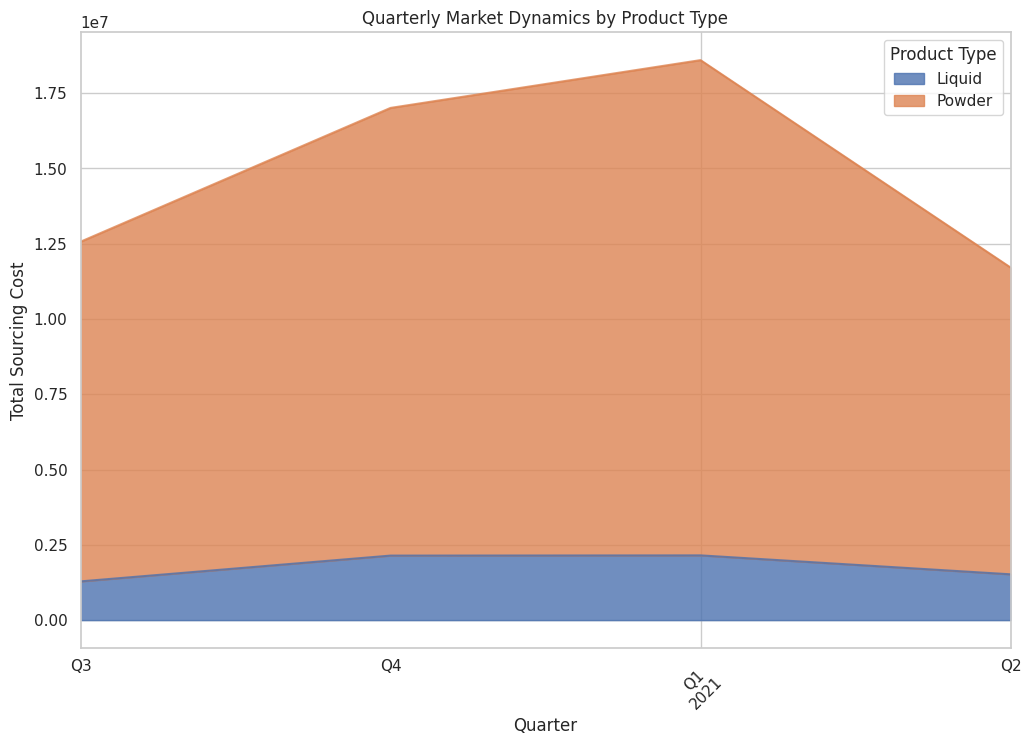

In [129]:
# Aggregate the total sourcing cost by quarter and product type
market_dynamics_data = df_train.groupby(['Quarter', 'Product Type'])['Sourcing Cost'].sum().reset_index()

# Pivot the data to get 'Quarter' as columns and 'Product Type' as rows
market_dynamics_pivot = market_dynamics_data.pivot_table(index='Product Type', columns='Quarter', values='Sourcing Cost', fill_value=0)

# Ensure both product types are included
print(market_dynamics_pivot)

# Plot the area chart correctly
market_dynamics_pivot.T.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.8)  # Transpose to correct the axis
plt.title('Quarterly Market Dynamics by Product Type')
plt.xlabel('Quarter')
plt.ylabel('Total Sourcing Cost')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(True)
plt.show()

Trend Identification:

* An upward trend in the area covered by each product type indicates increasing sourcing costs, which could suggest higher sales volumes or rising prices.

* **Seasonal Patterns:**
The sourcing costs for "Powder" peak in certain quarters each year, this could indicate seasonal demand.

* A consistently larger area for one product type indicates higher overall costs or volumes compared to the other.

### Average Sourcing Cost by Sourcing Channel and Product Type
This code snippet creates a bar plot using seaborn's barplot function to show the average sourcing cost by sourcing channel and product type. The x parameter is set to **'Product Type'**, the y parameter is set to 'Sourcing Cost', and the hue parameter is set to **'Sourcing Channel'**. This creates a bar plot with separate bars for each product type, grouped by sourcing channel. The plot title, axis labels, legend, grid, and tick labels are also set.

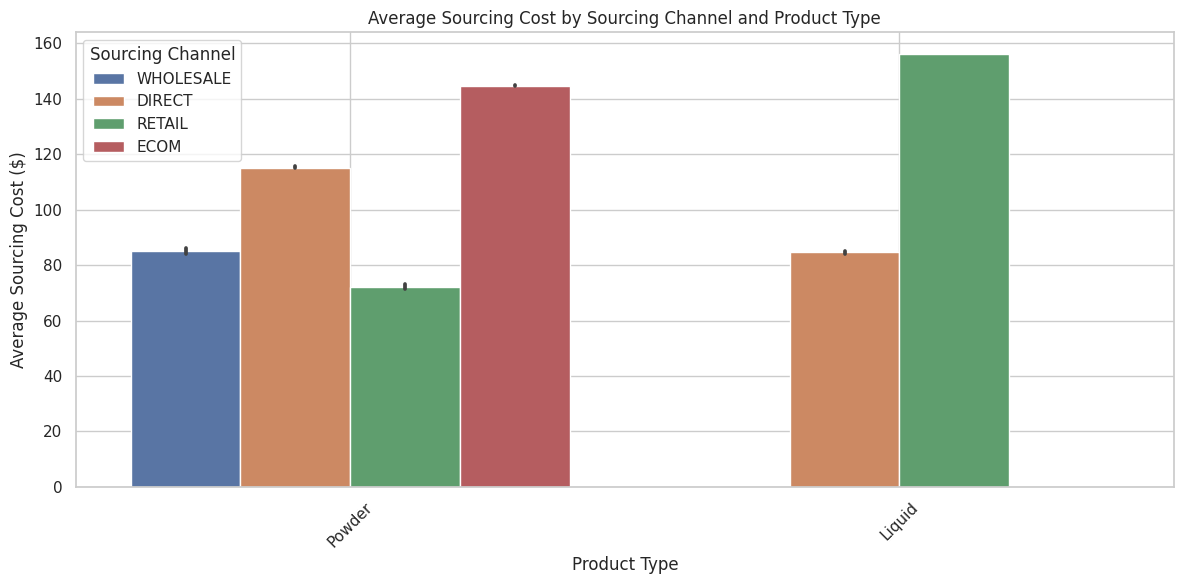

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_train, x='Product Type', y='Sourcing Cost', hue='Sourcing Channel')
plt.title('Average Sourcing Cost by Sourcing Channel and Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Sourcing Cost ($)')
plt.legend(title='Sourcing Channel')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates some nuanced differences in sourcing cost efficiency between channels across different product types. For "Powder" products, the Wholesale channel, contrary to the initial insight, appears to be slightly more cost-effective than Direct sourcing. This suggests that for powdered products, the benefits of bulk purchasing or established wholesale relationships might outweigh direct sourcing advantages. On the other hand, for "Liquid" products, Direct sourcing shows a significant cost advantage over Wholesale, indicating that direct relationships or reduced handling might reduce costs more effectively in these cases.

### Pie Chart of Sourcing Channel Usage

The second code snippet creates a pie chart using seaborn (which uses matplotlib under the hood) to show the usage of different sourcing channels. The value_counts method is used to count the occurrences of each sourcing channel in the **'Sourcing Channel'** column of the **df_train** dataframe. The pie function is then used to create the pie chart, with the labels parameter set to the index of the **df_sourcing_channel** series (i.e., the sourcing channel names), and the autopct parameter set to **'%1.1f%%'** to display the percentage values. The startangle parameter is set to 140 to rotate the pie chart slightly. The plot title, aspect ratio, and style are also set.

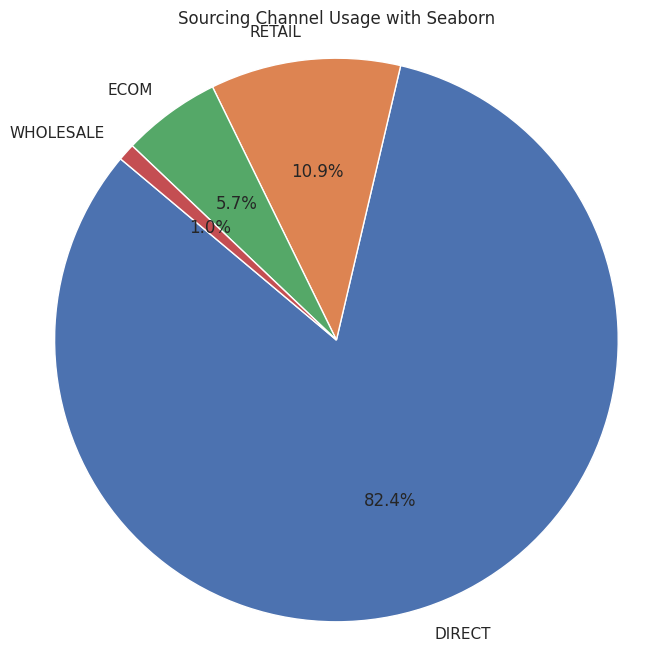

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sourcing channel
df_sourcing_channel = df_train['Sourcing Channel'].value_counts()

# Plotting the pie chart using seaborn (which uses matplotlib under the hood)
plt.figure(figsize=(8, 8), facecolor='white')
sns.set(style='whitegrid')
plt.pie(df_sourcing_channel, labels=df_sourcing_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Sourcing Channel Usage with Seaborn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The 'DIRECT' channel is the most utilized, accounting for approximately 82.45% of the sourcing activities.

# Insights: Outlier Detection

### Scatter Plot of Sourcing Costs by Manufacturer and Sourcing Channel
The code snippet creates a scatter plot of sourcing costs by manufacturer and sourcing channel. This plot can be used to identify any unusual patterns or outliers in the sourcing costs.

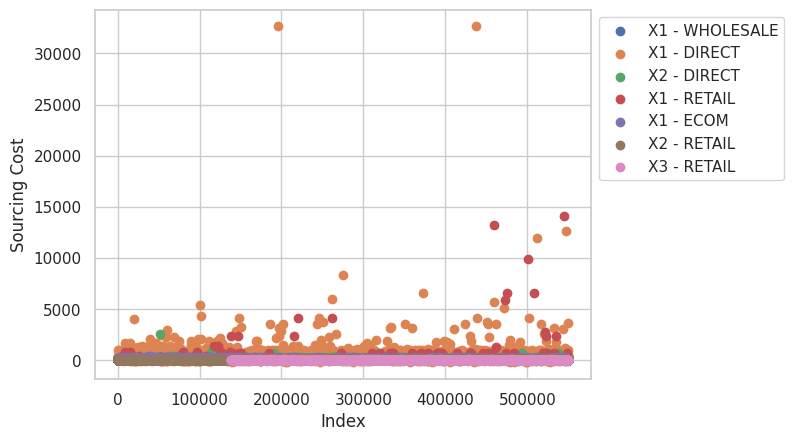

In [122]:
import matplotlib.pyplot as plt
import itertools

# Create a list of unique combinations of manufacturer and sourcing channel
combinations = df_train['Manufacturer'] + ' - ' + df_train['Sourcing Channel']
unique_combinations = combinations.unique()

# Create a figure and axis object
fig, ax = plt.subplots()

# Loop through each unique combination and create a scatter plot
for combination in unique_combinations:
    # Select the data for the current combination
    subset = df_train[combinations == combination]

    # Create a scatter plot with the current combination's data
    ax.scatter(subset.index, subset['Sourcing Cost'], label=combination, marker='o')

# Set the axis labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Sourcing Cost')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()

* The outliers are particularly noticeable within the **"X1 - DIRECT"** categories, suggesting these sourcing channels may occasionally involve significantly higher costs.

* Most of the sourcing costs, regardless of the channel or product type, cluster at the lower end of the cost spectrum, primarily below 5,000. This clustering indicates that typical sourcing costs are relatively low.

### Box Plot of Sourcing Costs by Product Type and Size
The second code snippet creates a box plot of sourcing costs by product type and size. This plot can be used to identify any outliers in the sourcing costs for specific product types and sizes.

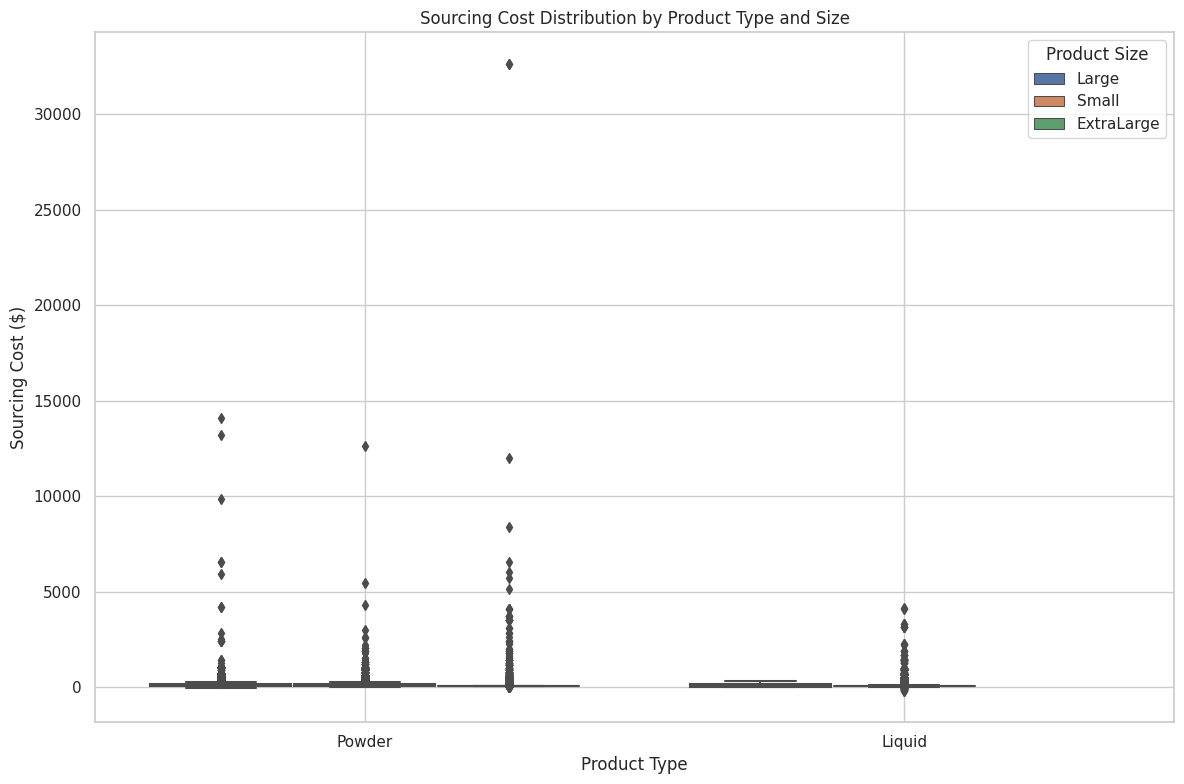

In [116]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train, x='Product Type', y='Sourcing Cost', hue='Product Size')
plt.title('Sourcing Cost Distribution by Product Type and Size')
plt.xlabel('Product Type')
plt.ylabel('Sourcing Cost ($)')
plt.legend(title='Product Size')
plt.grid(True)
plt.tight_layout()
plt.show()

The box plot analysis of sourcing costs by product type and size reveals significant variability and a range of outliers, suggesting that both factors considerably influence sourcing expenses. Products such as "Powder" exhibit a broader cost distribution, indicating a possibly complex supply chain or variable raw material quality. Notably, larger product sizes often show higher absolute costs but may offer economies of scale. These insights are crucial for making strategic sourcing decisions, such as optimizing product portfolios, negotiating supplier contracts, and managing supply chain efficiencies to reduce cost variability and leverage the most cost-effective product types and sizes.

### Control Chart for Sourcing Costs
The third code snippet creates a control chart for the sourcing costs. This chart can be used to monitor the sourcing costs over time and detect any unusual variations or outliers.

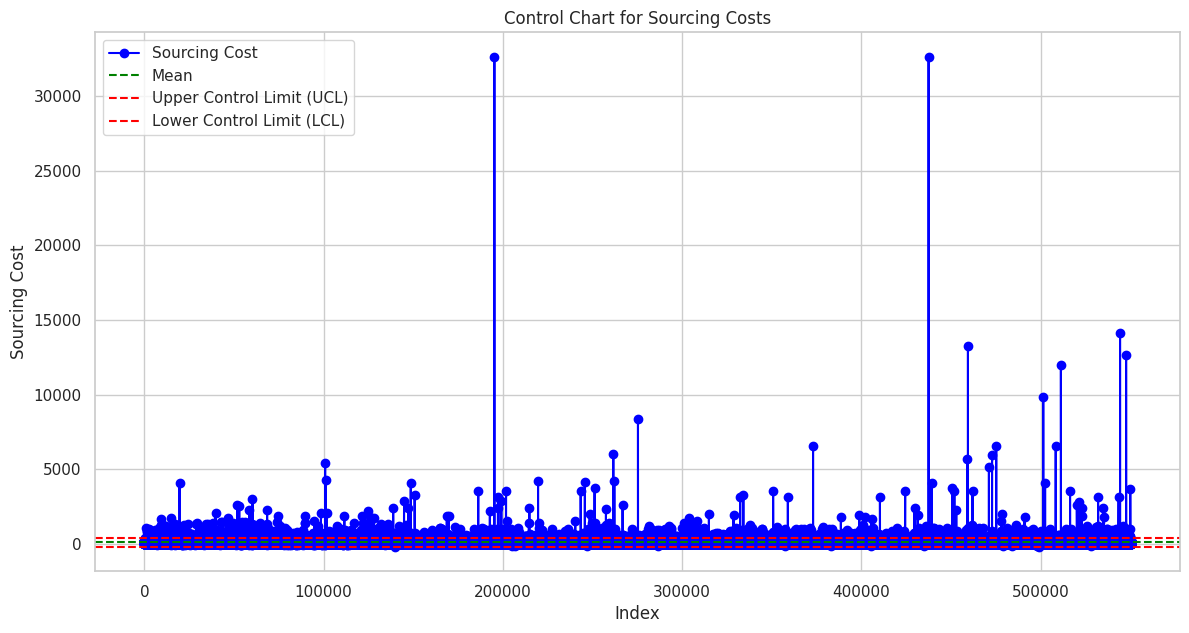

In [130]:
import numpy as np

# Calculate mean and standard deviation
mean_sourcing_cost = df_train['Sourcing Cost'].mean()
std_sourcing_cost = df_train['Sourcing Cost'].std()

# Calculate control limits
upper_control_limit = mean_sourcing_cost + 3 * std_sourcing_cost
lower_control_limit = mean_sourcing_cost - 3 * std_sourcing_cost

# Create the Control Chart
plt.figure(figsize=(14, 7))
plt.plot(df_train['Sourcing Cost'], marker='o', linestyle='-', color='blue', label='Sourcing Cost')
plt.axhline(mean_sourcing_cost, color='green', linestyle='--', label='Mean')
plt.axhline(upper_control_limit, color='red', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(lower_control_limit, color='red', linestyle='--', label='Lower Control Limit (LCL)')

# Adding labels and title
plt.title('Control Chart for Sourcing Costs')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

* **Stability and Process Control:**
 The majority of data points lie within the Upper Control Limit (UCL) and Lower Control Limit (LCL), suggesting that the sourcing cost process is generally stable and under control. The mean line, shown in dashed green, indicates the average sourcing cost across all observations.

* **Identification of Outliers:**
 Several points exceed the UCL, clearly standing out as potential outliers. These points represent sourcing costs that are significantly higher than typical costs and suggest instances of extraordinary spending or data errors that may require further investigation.
 
* **Clusters of Extreme Values:**
Notably, there are a few clusters where the sourcing costs spike dramatically, reaching close to 30,000. These clusters could indicate special cases, such as bulk purchases, emergency sourcing at higher costs, or possibly incorrect data entries.
 
* **Implications for Cost Management:**
The presence of these high outliers may skew the overall cost analysis and could lead to incorrect conclusions if not accounted for properly. Businesses may need to examine these cases individually to determine their nature and impact on the overall sourcing strategy.

### Quarterly Distribution of Sourcing Costs by Product Type
The fourth code snippet creates box plots for the distribution of sourcing costs each quarter, segmented by product type. This plot can be used to identify any outliers in the sourcing costs for specific quarters and product types

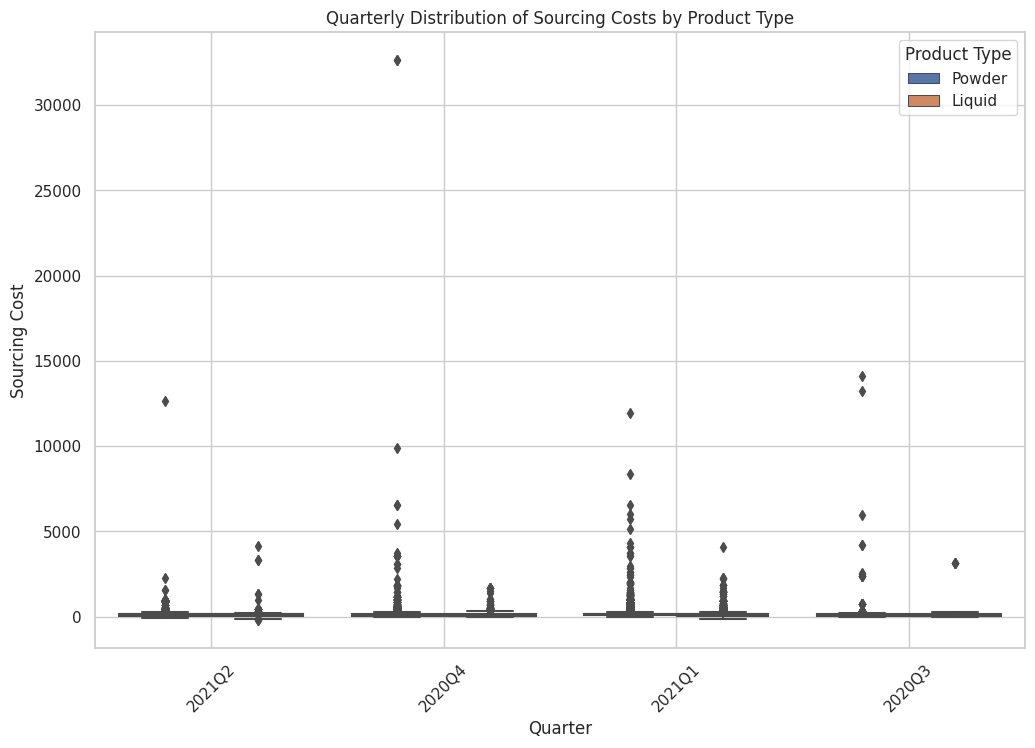

In [127]:
# Create box plots for the distribution of sourcing costs each quarter, segmented by product type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train_quarter, x='Quarter', y='Sourcing Cost', hue='Product Type')
plt.title('Quarterly Distribution of Sourcing Costs by Product Type')
plt.xlabel('Quarter')
plt.ylabel('Sourcing Cost')
plt.legend(title='Product Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The above box plot visualization provides several useful insights:

* **Variability and Range:** The box plots show the spread of sourcing costs for each product type across different quarters, indicating the variability within each group.
* **Median Costs:** The line within each box represents the median cost, providing a quick view of the central tendency for each product type in each quarter.
* **Outliers:** Points outside the whiskers indicate outliers, which are costs significantly higher or lower than the typical range. This could signal special circumstances or errors that may need investigation.

## Data Preprocessing Function

The Python function preprocess_csv automates the preprocessing of a CSV file for machine learning use. It loads the dataset into a pandas DataFrame, removes rows with missing values, encodes categorical variables like **ProductType**, **Manufacturer**, and others using **LabelEncoder**, and normalizes the Sourcing Cost using **StandardScaler**. This function ensures the data is clean, with numerical features standardized and categorical features encoded, making it ready for efficient model training and evaluation. This comprehensive preprocessing ensures all data features contribute equally to the analysis, optimizing the performance of subsequent machine learning algorithms.

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
def preprocess_csv(file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Handle missing values
    df = df.dropna() # Remove rows with missing values

    # Convert categorical variables to numerical variables using LabelEncoding
    labelencoder = LabelEncoder()
    df['ProductType'] = labelencoder.fit_transform(df['ProductType'])
    df['Manufacturer'] = labelencoder.fit_transform(df['Manufacturer'])
    df['Area Code'] = labelencoder.fit_transform(df['Area Code'])
    df['Sourcing Channel'] = labelencoder.fit_transform(df['Sourcing Channel'])
    df['Product Size'] = labelencoder.fit_transform(df['Product Size'])
    df['Product Type'] = labelencoder.fit_transform(df['Product Type'])
    df['Month of Sourcing'] = labelencoder.fit_transform(df['Month of Sourcing'])

    # Scale numerical variables using StandardScaler
    scaler = StandardScaler()
    df['Sourcing Cost'] = scaler.fit_transform(df[['Sourcing Cost']])

    # Return the preprocessed DataFrame
    return df

In [133]:
#Passing the Train and test data path to preprocess_csv function to carry out preprocessing steps on training and testing data and saving the resultant output in new dataframes, labeling them as preprocessed dataframes.
df_train_preprocessed = preprocess_csv(train_data_path)
df_test_preprocessed = preprocess_csv(test_data_path)

In this section, we use the `preprocess_csv` function to preprocess both the training and testing datasets.

## Comprehensive Regression Model Evaluation

This script is designed to evaluate several regression models on preprocessed training and testing datasets. Each model is fitted to the training data, used to predict sourcing costs on the testing data, and then evaluated based on several performance metrics. The results are compiled and saved for further analysis. Below is an overview of the models used and the general steps followed in the evaluation process.

### Models Evaluated
- **Decision Tree Regressor**: A simple model that makes decisions based on the data's features, useful for capturing non-linear relationships.
- **XGBoost**: An advanced ensemble model that uses gradient boosting frameworks for high efficiency and flexibility.
- **LightGBM**: A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms, used for large datasets.
- **CatBoost**: An algorithm that handles categorical variables and provides state-of-the-art results without extensive data training typically required by other machine learning methods.
- **Linear Regression**: A fundamental model for understanding relationships between variables, providing a baseline for performance comparison.
- **AdaBoost Regressor**: Combines multiple weak models to create a strong predictive model, typically using decision trees as the base models.
- **Random Forest Regressor**: An ensemble of decision trees, generally known for high accuracy and robustness against overfitting.
- **Gradient Boosting Regressor**: An additive model that minimizes a loss function iteratively, known for its effectiveness in various applications.
- **K Nearest Neighbors (KNN) Regressor**: A simple, instance-based learning model where predictions are derived from surrounding neighbors.

### Evaluation Metrics
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors—i.e., the average squared difference between the estimated values and the actual value.
- **R-squared (R2)**: Provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.
- **Average Error**: Represents the average magnitude of the errors in a set of predictions, without considering their direction.
- **Median Error**: The median of all absolute differences between the target and predicted variables.

### Execution Process
Each model is applied to the training dataset to learn from the features, and predictions are made on the test dataset. Performance metrics for each model are calculated and compiled into a comprehensive report, which is then saved to a specified CSV file. This allows for a straightforward comparison of how each model performs across different metrics and can aid in selecting the most effective model for the given problem.

The integration of diverse models and the systematic evaluation of their performance highlights the script's utility in a real-world data science workflow, enabling effective decision-making based on robust analytical evidence.

In [134]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


def evaluate_regression_algorithms(df_train_preprocessed, df_test_preprocessed, output_csv_path):
    results = []
    
    # Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_dt = dt_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    dt_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_dt, 'DecisionTreeRegressor')
    results.append(dt_metrics)
    
    # XGBoost
    params_xgb = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1
    }

# Train an XGBoost model on the training set
    dtrain = xgb.DMatrix(df_train_preprocessed.drop('Sourcing Cost', axis=1), label=df_train_preprocessed['Sourcing Cost'])
    dtest = xgb.DMatrix(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    xgb_model = xgb.train(params_xgb, dtrain, num_boost_round=100)
    y_pred_xgb = xgb_model.predict(dtest)
    xgb_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_xgb, 'XGBoost')
    results.append(xgb_metrics)
    
    # LightGBM
    lgb_train = lgb.Dataset(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbosity': -1
    }
    lgb_model = lgb.train(params_lgb, lgb_train, num_boost_round=100)
    y_pred_lgb = lgb_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    lgb_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_lgb, 'LightGBM')
    results.append(lgb_metrics)
    
    # CatBoost
    cat_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
    train_pool = cb.Pool(data=df_train_preprocessed.drop('Sourcing Cost', axis=1), label=df_train_preprocessed['Sourcing Cost'], cat_features=cat_features)
    cb_model = cb.CatBoostRegressor(
        loss_function='RMSE',
        eval_metric='RMSE',
        depth=6,
        learning_rate=0.03,
        iterations=1000,
        early_stopping_rounds=50,
        random_seed=42,
        verbose=0
    )
    cb_model.fit(train_pool)
    test_pool = cb.Pool(data=df_test_preprocessed.drop('Sourcing Cost', axis=1), cat_features=cat_features)
    y_pred_cb = cb_model.predict(test_pool)
    cb_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_cb, 'CatBoost')
    results.append(cb_metrics)
    
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_lr = lr_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    lr_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_lr, 'LinearRegression')
    results.append(lr_metrics)
    
    # AdaBoost
    base_estimator = DecisionTreeRegressor(max_depth=2)
    ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, loss='linear', random_state=42)
    ada_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_ada = ada_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    ada_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_ada, 'AdaBoostRegressor')
    results.append(ada_metrics)
    
    # Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_rf = rf_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    rf_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_rf, 'RandomForestRegressor')
    results.append(rf_metrics)
    
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, loss='squared_error', random_state=42)
    gb_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_gb = gb_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    gb_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_gb, 'GradientBoostingRegressor')
    results.append(gb_metrics)
    
    # K Nearest Neighbors
    knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2)
    knn_model.fit(df_train_preprocessed.drop('Sourcing Cost', axis=1), df_train_preprocessed['Sourcing Cost'])
    y_pred_knn = knn_model.predict(df_test_preprocessed.drop('Sourcing Cost', axis=1))
    knn_metrics = evaluate_regression_metrics(df_test_preprocessed['Sourcing Cost'], y_pred_knn, 'KNeighborsRegressor')
    results.append(knn_metrics)
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv_path, index=False)
    print("Results saved to:", output_csv_path)


def evaluate_regression_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    avg_error = mean_squared_error(y_true, y_pred, squared=False)
    median_error = median_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'Mean Squared Error': mse, 'R-squared': r2, 'Average Error': avg_error, 'Median Error': median_error}

In [135]:
#We pass the training and testing dataset to the above code, and we save results of individual model to results.csv file and save it in kaggle's output.
evaluate_regression_algorithms(df_train_preprocessed, df_test_preprocessed, 'results.csv')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Results saved to: results.csv


In [153]:
#Calling the results dataframe saved in kaggle output to find out the best model appropriate to predict accurately the sourcing cost for June-21 month
results_df = pd.read_csv('/kaggle/working/results.csv')

In [154]:
#Sorting the Dataframe in ascending order by Mean Squared Error column as we expect to have minimum error in actual and true values.
results_df.sort_values(['Mean Squared Error'])

,Model,Mean Squared Error,R-squared,Average Error,Median Error
3,CatBoost,0.463820,0.536180,0.681044,0.439619
2,LightGBM,0.488199,0.511801,0.698712,0.455645
6,RandomForestRegressor,0.506464,0.493536,0.711663,0.426955
0,DecisionTreeRegressor,0.527082,0.472918,0.726004,0.417137
8,KNeighborsRegressor,0.528640,0.471360,0.727076,0.462771
7,GradientBoostingRegressor,0.547322,0.452678,0.739812,0.480439
1,XGBoost,0.547356,0.452644,0.739835,0.480441
4,LinearRegression,0.812172,0.187828,0.901206,0.608989
5,AdaBoostRegressor,0.884036,0.115964,0.940232,0.646044


### Bar Plot Visualization of Regression Model Metrics

This code segment sets up and displays a bar plot to compare the performance of various regression models across different metrics. The DataFrame `results_df` is prepared by setting 'Model' as the index, which facilitates easier plotting. A bar chart is then generated using Matplotlib, where each model's performance metrics are represented as bars. The plot includes customization for the title, labels, and the orientation of the x-axis labels to enhance readability. This visualization provides a clear, comparative overview of the models, making it easy to assess which model performs best on which metric.

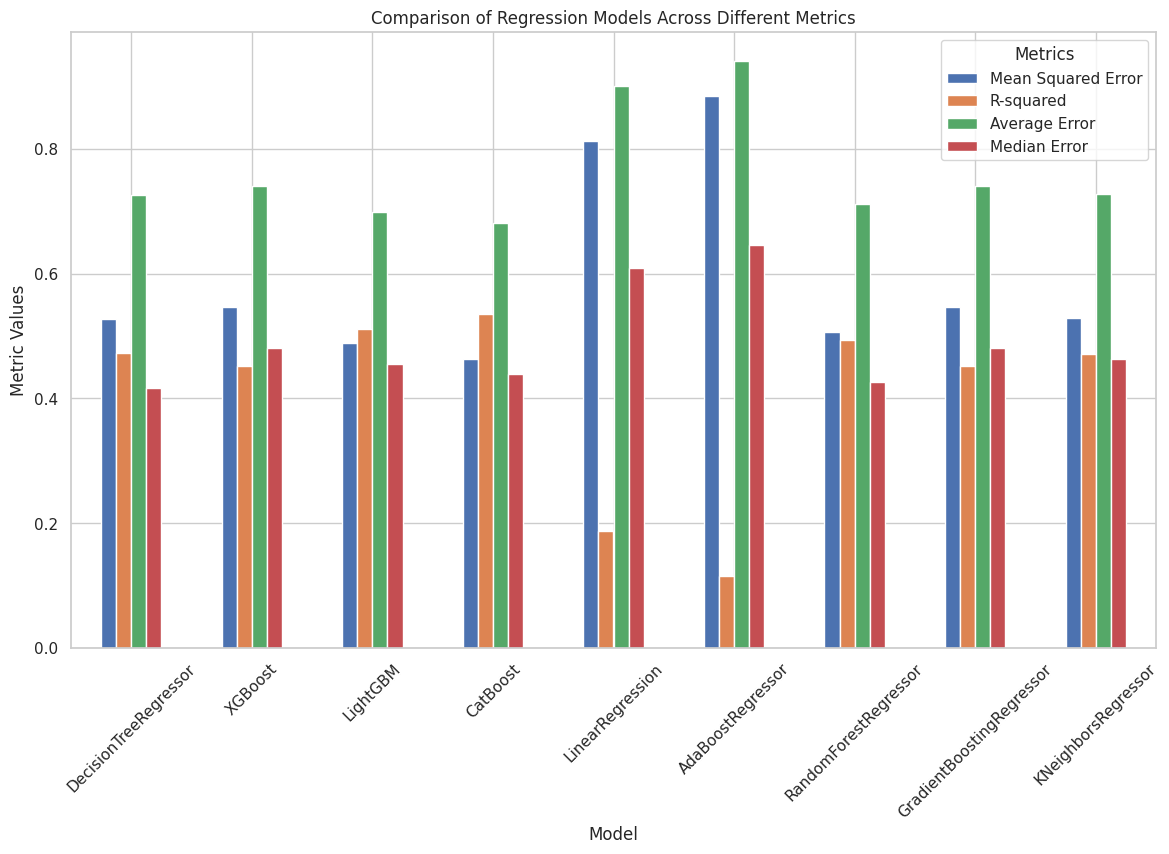

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
# Set the index to 'Model' for plotting
results_df_bar = results_df
results_df_bar.set_index(['Model'], inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
results_df.plot(kind='bar', ax=ax)
ax.set_title('Comparison of Regression Models Across Different Metrics')
ax.set_ylabel('Metric Values')
ax.set_xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

Visualising bar plots, covering all the individual evaluation metrics for different models, through the bar graphs.

### Subplot Visualization of Each Metric for Regression Models

In this segment, the same dataset `results_df` is used to create a more detailed visualization with a 2x2 grid of subplots, each dedicated to a different performance metric: Mean Squared Error, R-squared, Average Error, and Median Error. Each subplot is a bar chart that displays the values of the metric for all models, allowing for detailed comparisons across the models on specific metrics. This layout helps in isolating the performance of each metric and provides a comprehensive visual assessment. Each subplot is individually styled and labeled, and the arrangement is optimized for clarity and non-overlapping presentation. This detailed visualization approach helps stakeholders quickly grasp the strengths and weaknesses of each model in terms of different statistical measures.

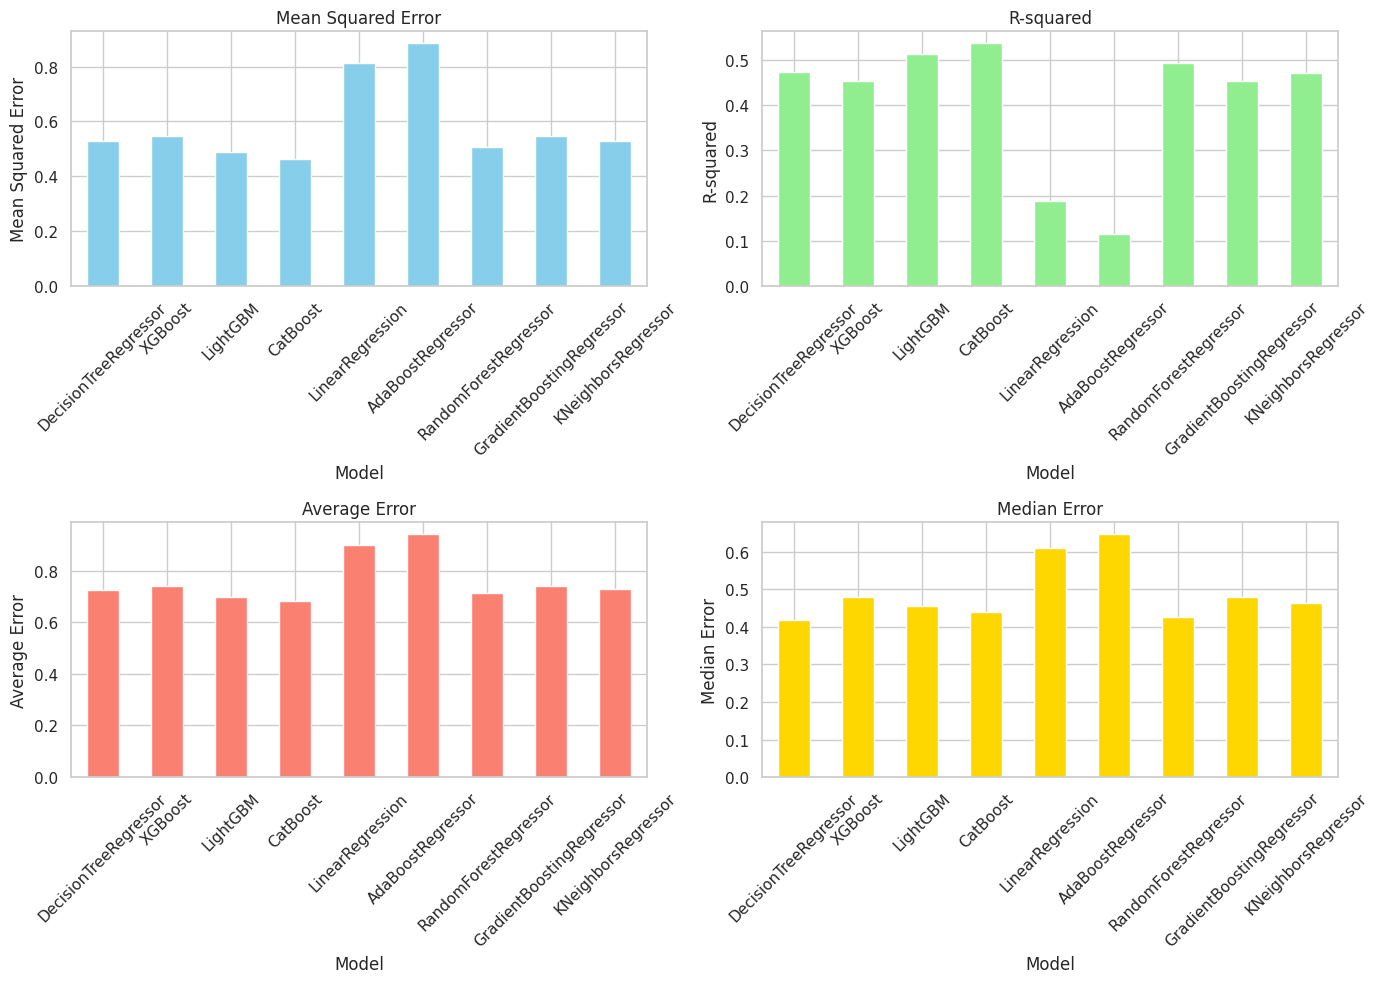

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

results_df_subplot = results_df
# results_df_subplot.set_index(['Model'], inplace=True)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the size as needed

# Flatten the axis array
axs = axs.flatten()

# Plot Mean Squared Error
results_df_subplot['Mean Squared Error'].plot(kind='bar', ax=axs[0], color='skyblue', title='Mean Squared Error')
axs[0].set_ylabel('Mean Squared Error')
axs[0].set_xticklabels(results_df_subplot.index, rotation=45)

# Plot R-squared
results_df_subplot['R-squared'].plot(kind='bar', ax=axs[1], color='lightgreen', title='R-squared')
axs[1].set_ylabel('R-squared')
axs[1].set_xticklabels(results_df_subplot.index, rotation=45)

# Plot Average Error
results_df_subplot['Average Error'].plot(kind='bar', ax=axs[2], color='salmon', title='Average Error')
axs[2].set_ylabel('Average Error')
axs[2].set_xticklabels(results_df_subplot.index, rotation=45)

# Plot Median Error
results_df_subplot['Median Error'].plot(kind='bar', ax=axs[3], color='gold', title='Median Error')
axs[3].set_ylabel('Median Error')
axs[3].set_xticklabels(results_df_subplot.index, rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

We consider Mean Square Error, as our criteria to select the best model. The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth. Hence based on the MSE Score, the model with the lowest value will be selected as our final model.

Hence, we select CatBoost model, since it has provided an MSE score of 0.463820, the lowest among all.

# Implementing CatBoost Model
In this analysis, we are deploying the CatBoost algorithm, a high-performance gradient boosting framework that is especially effective with categorical features. Our primary criterion for model selection is the Mean Squared Error (MSE), which serves as a robust indicator of model accuracy. MSE quantifies the average squared difference between the actual and predicted values, providing a clear measure of prediction quality. The model demonstrating the lowest MSE will be considered optimal, as it suggests the smallest deviation from the true data points.

### Model Setup and Training
- **Data Preparation**: We start by separating the features and the target variable ('Sourcing Cost') from our preprocessed training dataset. We also identify categorical features explicitly to leverage CatBoost's handling of categorical data, enhancing model performance.
- **Model Configuration**: We configure the CatBoost model with parameters tailored to minimize the RMSE, including setting the depth, learning rate, and iterations. An early stopping mechanism is employed to prevent overfitting.
- **Training**: The model is trained on the training dataset encapsulated within CatBoost's own data structure, `Pool`, which optimizes processing of categorical features.

### Prediction and Evaluation
- **Testing**: After training, the model is used to predict 'Sourcing Cost' on a similarly preprocessed test dataset.
- **Performance Metrics**: We calculate MSE to assess prediction accuracy, alongside R-squared, Average Error, and Median Error for a comprehensive evaluation of model performance.

### Saving the Model
- **Persistence**: Finally, the trained model is saved using `joblib`, ensuring it can be reloaded for future predictions or further analysis.

By focusing on MSE, we align our model evaluation closely with our objective of achieving high prediction accuracy, ensuring that our chosen model truly reflects the underlying data patterns and can be relied upon for decision-making.

In [165]:
#Calling the CatBoost Model to find out predicted values and saving the model in kaggle output
import pandas as pd
import catboost as cb
from sklearn.metrics import mean_squared_error
import joblib


# Extract input features and target variable from the training set
X_train = df_train_preprocessed.drop('Sourcing Cost', axis=1)
y_train = df_train_preprocessed['Sourcing Cost']

# Define the categorical features
cat_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']

# Convert the dataset to CatBoost's data format
train_pool = cb.Pool(data=X_train, label=y_train, cat_features=cat_features)

# Define the CatBoost model parameters
params = {
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'depth': 6,
    'learning_rate': 0.03,
    'iterations': 1000,
    'early_stopping_rounds': 50,
    'random_seed': 42
}

# Train a CatBoost model on the training set
cb_model = cb.CatBoostRegressor(**params)
cb_model.fit(train_pool)

# Extract input features from the test set
X_test = df_test_preprocessed.drop('Sourcing Cost', axis=1)

# Convert the test dataset to CatBoost's data format
test_pool = cb.Pool(data=X_test, cat_features=cat_features)

# Make predictions on the test set using the trained model
y_pred = cb_model.predict(test_pool)

# Evaluate the performance of the model using Mean Squared Error
mse = mean_squared_error(df_test_preprocessed['Sourcing Cost'], y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(df_test_preprocessed['Sourcing Cost'], y_pred)
print('R-squared:', r2)

avg_error = mean_squared_error(df_test_preprocessed['Sourcing Cost'], y_pred, squared=False)
print('Average Error:', avg_error)

median_error = median_absolute_error(df_test_preprocessed['Sourcing Cost'], y_pred)
print('Median Error:', median_error)

filename = 'catboost_model.joblib'
joblib.dump(cb_model, filename)

# Print a message to confirm that the model was saved
print(f'The model was saved to {filename}')

0:	learn: 0.9934965	total: 342ms	remaining: 5m 42s
1:	learn: 0.9873465	total: 613ms	remaining: 5m 5s
2:	learn: 0.9815189	total: 822ms	remaining: 4m 33s
3:	learn: 0.9760045	total: 1.03s	remaining: 4m 17s
4:	learn: 0.9707873	total: 1.26s	remaining: 4m 10s
5:	learn: 0.9658010	total: 1.5s	remaining: 4m 9s
6:	learn: 0.9610825	total: 1.74s	remaining: 4m 7s
7:	learn: 0.9566252	total: 1.97s	remaining: 4m 3s
8:	learn: 0.9524086	total: 2.18s	remaining: 4m
9:	learn: 0.9484418	total: 2.48s	remaining: 4m 5s
10:	learn: 0.9446829	total: 2.7s	remaining: 4m 2s
11:	learn: 0.9412608	total: 2.93s	remaining: 4m 1s
12:	learn: 0.9380110	total: 3.16s	remaining: 4m
13:	learn: 0.9347828	total: 3.38s	remaining: 3m 57s
14:	learn: 0.9317341	total: 3.6s	remaining: 3m 56s
15:	learn: 0.9288690	total: 3.81s	remaining: 3m 54s
16:	learn: 0.9261548	total: 4.09s	remaining: 3m 56s
17:	learn: 0.9235747	total: 4.33s	remaining: 3m 56s
18:	learn: 0.9211415	total: 4.54s	remaining: 3m 54s
19:	learn: 0.9189028	total: 4.77s	remain

# Conclusion
By integrating data-driven insights with advanced predictive modeling techniques, this program not only aims to enhance the accuracy of sourcing cost predictions but also contributes to more strategic and cost-effective sourcing decisions. It exemplifies a practical application of machine learning in operational and strategic business contexts, underlining the importance of data science in contemporary business practices.